## Logistic Regression in Python using Scikit-Learn
 
This program is a simple example to demonstrate how to apply a classification model using Logistic Regression algorithm. The goal is to predict two possible classes of customers, they that will purchase or not a SUV model.

**Dataset Description**

The dataset is composed by 3 columns and 400 rows. The feature (columns) are Age, Estimated Salary and Purchases (target variable 0 or 1). Each row represents one customer.

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # Independent variables
y = dataset.iloc[:,-1].values # Target

In [4]:
dataset.shape

(400, 3)

In [6]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting Dataset into Train and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##  Feature Scaling

For the almost cases of classification it is necessary to apply feature scaling due to our target 0 or 1.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Building the model - Logistic Regression

The logistic regression is a linear method that considers the logistic function, defined as:

$f(x) = \frac{1}{1 + e^{-x}}$.

When we consider this function in a regression model, it returns the probability of occurrence. To a classification model, this probability can be interpreted as: to likelihood <0.5 we consider 0 else 1.

The class that we consider to build this model is linear_model from scikit-learn and the object is Logistic Regression.

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

### Training the model

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
classifier.coef_

array([[2.00316198, 1.08088613]])

### Making a single prediction 

In [25]:
xc = classifier.predict(sc.transform([[30, 120000]]))
if xc == 0:
    print("Non, ce client n'est pas un possible acheteur, passez à une autre chose")
else :
    print("Oui, ce client est un possible acheteur, contuniez.")

Non, ce client n'est pas un possible acheteur, passez à une autre chose


### Predicting new results

In [18]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

### Metrics (accuracy and confusion matrix)

It's important to know how efficient is our model, to do it we have some options as accuracy and confusion matrix.

**Accuracy (definition from Scikit-Learn website)**

The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

If $\hat{y}_{i}$ is the predicted value of the $i$-th sample and $y_{i}$ is the corresponding true value, then the fraction of correct predictions over $n_{samples}$ is defined as

$Accuracy(y_{i}, \hat{y}_{i}) = \frac{1}{n_{samples}} \sum^{n_{samples}}_{i = 0} 1(\hat{y}_{i} = y_{i})$,

where $1(x)$ is the indicator function, if the values are differents this function returns $0$.

**Confusion Matrix (definition from Scikit-Learn website)**

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{1,0}$.

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(accuracy_score(y_test, y_pred))

[[52  6]
 [ 3 19]]
0.8875


### Visualising the Training set results

In this problem we can visualize the results because we have two independent variables. Problems with more than two independent variables is impossible to visualize. 


#### Visualizing the training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


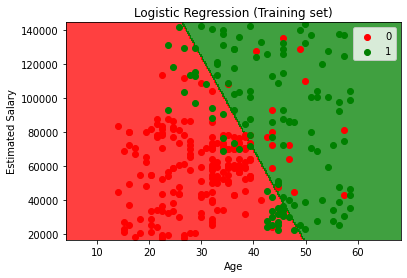

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing the test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


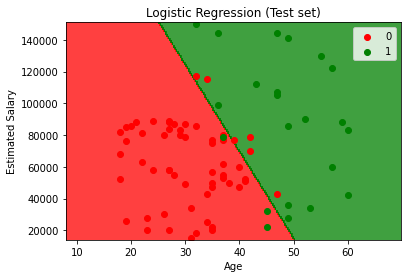

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Conclusion

This program is a simple example of Logistic Regression using Scikit-Learn to classify a possible costumer to a SUV model. As we can see, the linear model draw a straight line that separates the graphic in two regions, red and green (0 and 1, respectively). The model has a good accuracy, but this is not the better model to analysis this kind of problem. The curve has a considerable slope that imposes some problems, for example, someone that have 20 years old and a higher salary 120000 dollars can be a possible costumer, due to the relation between salary and decision, but in this problem this costumer will not to buy. Other problem interpretation is someone with 50 years old and low salary as a costumer, this indicates that age is more decisive.